In [2]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\Jora
[nltk_data]     Ismaili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Jora
[nltk_data]     Ismaili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words("english"))                        # load English stopwords from NLTK
stemmer = PorterStemmer()                                           # create a new Porter stemmer

In [4]:
# Define text preprocessing functions
def clean_text(text):
    text = text.lower()                                             # convert to lowercase
    spaces = re.compile(r'\s+')
    text = spaces.sub(' ', text)                                    # substitute all white space characters (single or multiple occurences) with a single space

    emails = re.compile(r'\S+@\S+\.\S+')
    text = emails.sub('EMAIL', text)                              # substitute all found email addresses with EMAIL
    urls = re.compile(r'http[s]?:\/\/\S+|www\.\S+|\S+\.[a-z]+\/\S+|\w+\.(?:com|net|org)')
    text = urls.sub('URL', text)                                  # substitute all found URLs with URL
    dates = re.compile(r'''
                       \d{1,4}[-\/]\d{1,2}[-\/]\d{1,4}|
                       \d{1,2}\ (?:jan[a-z]*|feb[a-z]*|mar[a-z]*|apr[a-z]*|may|jun[e]?|jul[y]?|aug[a-z]*|sep[a-z]*|oct[a-z]*|nov[a-z]*|dec[a-z]*)\ \d{,4}|
                       (?:jan[a-z]*|feb[a-z]*|mar[a-z]*|apr[a-z]*|may|jun[e]?|jul[y]?|aug[a-z]*|sep[a-z]*|oct[a-z]*|nov[a-z]*|dec[a-z]*)[,.]?\ ?\d{1,4}(?:th|st|nd|rd)?(?:,\ \d{4})?
                       ''', re.VERBOSE)
    text = dates.sub('DATE', text)                                # substitute all found dates with DATE
    numbers = re.compile(r'\d+(?:th|st|nd|rd)?')
    text = numbers.sub('NUM', text)                               # substitute all remaining numbers with NUM
    return text

def remove_stopwords_and_stem(tokens):
    return [stemmer.stem(word) for word in tokens if word not in stop_words]

In [5]:
# File paths
input_file = "995,000_rows.csv"
processed_file = "processed_fake_news.csv"
processed_2_file = "processed_2_file_news.csv"

In [5]:
# Read and process in chunks
reader = pd.read_csv(input_file, usecols=['domain', 'type', 'url', 'content', 'title'], chunksize=10000)
first_chunk = True  # Track the first chunk for writing header

for chunk in reader:
    chunk = chunk.dropna(subset=['content', 'type'])                                    # drop rows with no content or type (/label)
    chunk = chunk.drop(chunk[chunk['type'] == 'unknown'].index)                         # drop rows where 'type' is 'unknown'
    chunk = chunk.drop(chunk[chunk['type'] == 'unreliable'].index)                      # drop rows where 'type' is 'unreliable'
    chunk = chunk.drop_duplicates(subset=['content'])                                   # drop rows with duplicates in the 'content' column

    # Apply text preprocessing pipeline
    chunk["content"] = chunk["content"].apply(clean_text)                               # cleaning the text in the content column
    chunk["content"] = chunk["content"].apply(word_tokenize)                            # tokenizing the text in the content column
    chunk["stemmed_tokens"] = chunk["content"].apply(remove_stopwords_and_stem)         # removing stopwords and stemming the tokens 

    # Write and save processed chunk to csv file
    chunk.to_csv(processed_2_file, mode="w" if first_chunk else "a", index=False, header=first_chunk)
    first_chunk = False # Ensure only the first chunk writes header

    print(f"Processed and saved a chunk of {len(chunk)} rows.")

print("Processing complete! Data saved to:", processed_2_file)

Processed and saved a chunk of 7903 rows.
Processed and saved a chunk of 7950 rows.
Processed and saved a chunk of 7888 rows.
Processed and saved a chunk of 7722 rows.
Processed and saved a chunk of 7840 rows.
Processed and saved a chunk of 7977 rows.
Processed and saved a chunk of 7891 rows.
Processed and saved a chunk of 7894 rows.
Processed and saved a chunk of 7948 rows.
Processed and saved a chunk of 7901 rows.
Processed and saved a chunk of 7685 rows.
Processed and saved a chunk of 7697 rows.
Processed and saved a chunk of 7776 rows.
Processed and saved a chunk of 7905 rows.
Processed and saved a chunk of 8017 rows.
Processed and saved a chunk of 7810 rows.
Processed and saved a chunk of 7801 rows.
Processed and saved a chunk of 7888 rows.
Processed and saved a chunk of 7867 rows.
Processed and saved a chunk of 7454 rows.
Processed and saved a chunk of 7467 rows.
Processed and saved a chunk of 7579 rows.
Processed and saved a chunk of 7622 rows.
Processed and saved a chunk of 739

The number of URLs in the (cleaned) content is: 367154
The number of dates in the (cleaned) content is: 802665
The number of numeric values in the (cleaned) content is: 5228334
Vocabulary size after cleaning (without punctuation): 1159710
Vocabulary size after stemming and stopword removal (without punctuation): 1012058
Reduction rate after stemming and stopword removal: 12.73%
100 most frequent words (before stopword removal and stemming): 
 [('the', 21990018), ('to', 10297881), ('of', 10100974), ('and', 9517184), ('a', 8372977), ('in', 7256408), ('NUM', 5158047), ('that', 4806384), ('is', 4151598), ('for', 3638203), ('it', 3100384), ('on', 2933451), ('with', 2389735), ('s', 2335295), ('as', 2298313), ('was', 2167610), ('i', 2122272), ('are', 1965737), ('by', 1955986), ('this', 1920003), ('he', 1917320), ('be', 1835623), ('you', 1811772), ('at', 1797524), ('not', 1764059), ('have', 1752830), ('from', 1654939), ('has', 1477909), ('they', 1476764), ('but', 1460708), ('an', 1424225), ('w

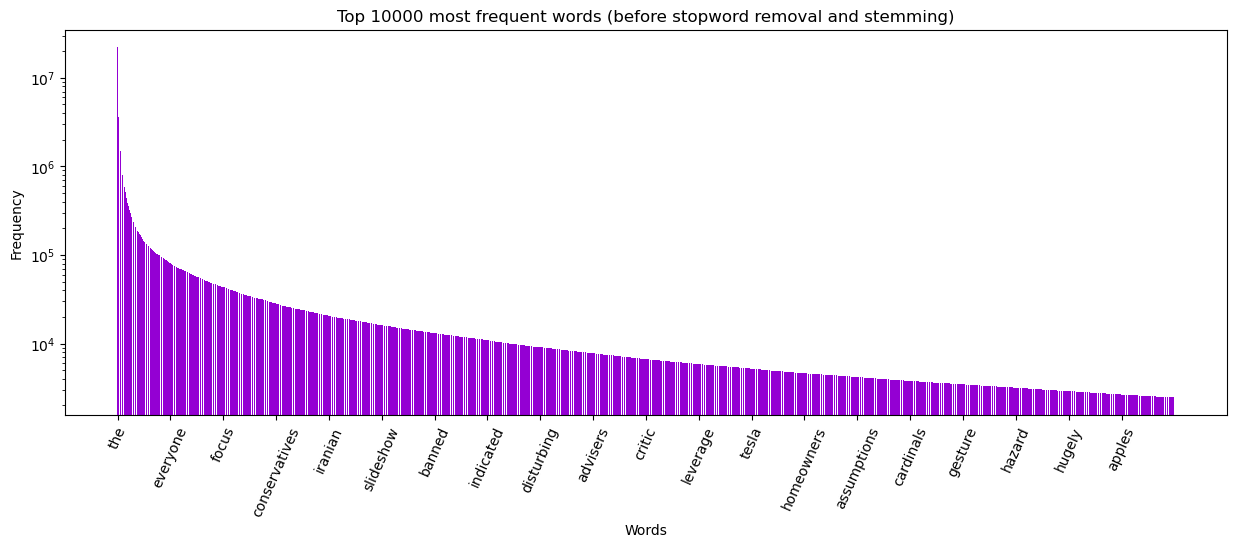

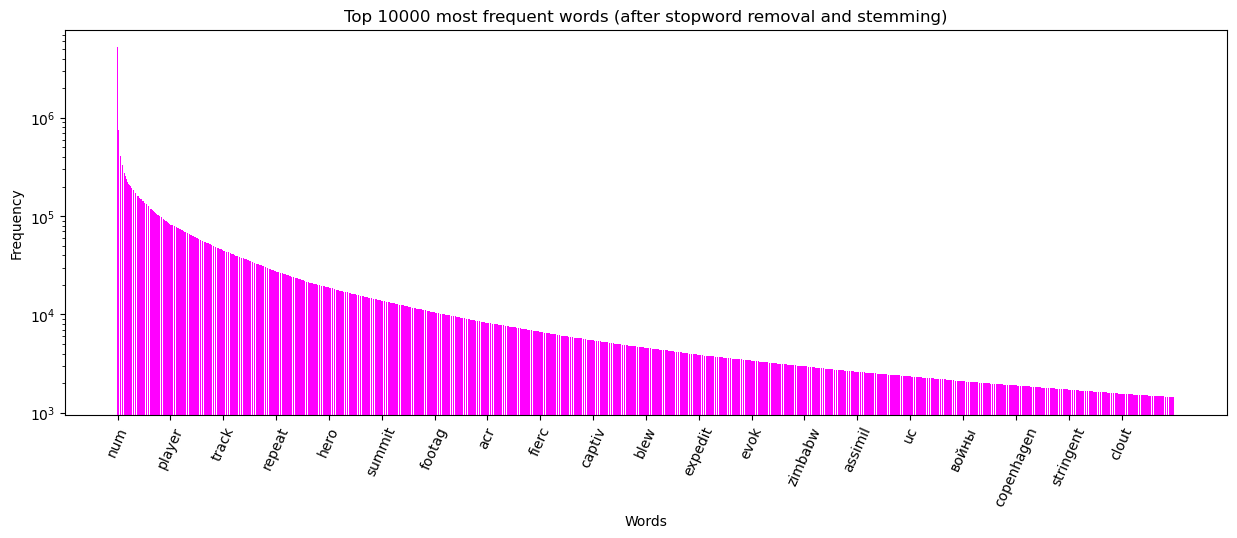

In [6]:
# Initialize global frequency distributions
global_freq_tokens = FreqDist()
global_freq_stemmed = FreqDist()

# Process content (which contains the tokenized content) and stemmed_tokens in chunks
# Collect words after tokenizing and before and after stopword removal and stemming
for chunk in pd.read_csv(processed_2_file, usecols=['content', 'stemmed_tokens'], chunksize=10000):
    # Here we also remove punctuation as they otherwise would dominate and clutter the "most frequent words" list
    all_tokens = [word for doc in chunk["content"] for word in eval(doc) if word.isalnum() or word.startswith("_")]
    stemmed_tokens = [word for doc in chunk["stemmed_tokens"] for word in eval(doc) if word.isalnum() or word.startswith("_")]

    # Update frequency distributions
    global_freq_tokens.update(all_tokens)
    global_freq_stemmed.update(stemmed_tokens)

# Print insights
print("The number of URLs in the (cleaned) content is:", global_freq_stemmed['url'])
print("The number of dates in the (cleaned) content is:", global_freq_stemmed['date'])
print("The number of numeric values in the (cleaned) content is:", global_freq_stemmed['num'])

print("Vocabulary size after cleaning (without punctuation):", global_freq_tokens.B())
print("Vocabulary size after stemming and stopword removal (without punctuation):", global_freq_stemmed.B())

reduction_rate = (global_freq_tokens.B() - global_freq_stemmed.B()) / global_freq_tokens.B() * 100
print(f"Reduction rate after stemming and stopword removal: {reduction_rate:.2f}%")

print("100 most frequent words (before stopword removal and stemming): \n", global_freq_tokens.most_common(100))
print("100 most frequent words (after stopword removal and stemming): \n", global_freq_stemmed.most_common(100))

# Function to plot word frequency distribution (barplot)
def plot_word_freq(sorted_word_freq, title, color):
    words, freq = zip(*sorted_word_freq)                                    # split the given list into two tuples
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(freq)), freq, color=color)
    plt.xticks(range(0, len(words), 500), words[::500], rotation=66)        # rotating the x-axis labels for readbility and set to show every 500th word only
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.title(title)
    plt.show()

# Plotting the frequency distribution of the top 10000 words before and after stopword removal and stemming
plot_word_freq(global_freq_tokens.most_common(10000), 'Top 10000 most frequent words (before stopword removal and stemming)', 'darkviolet')
plot_word_freq(global_freq_stemmed.most_common(10000), 'Top 10000 most frequent words (after stopword removal and stemming)', 'magenta')

In [7]:
from sklearn.model_selection import train_test_split
import ast

resulting_data = pd.read_csv(processed_2_file)
print(resulting_data.shape)

resulting_data['type'] = resulting_data['type'].drop(resulting_data[resulting_data['type'] == 'satire'].index)

print(resulting_data['type'].value_counts())

fake_lables = ['bias', 'fake', 'conspiracy', 'rumor', 'junksci', 'hate', 'satire']
reliable_lables = ['political', 'reliable', 'clickbait']

resulting_data = resulting_data[resulting_data['type'].isin(fake_lables + reliable_lables)]        # Keep only relevant types
resulting_data['type'] = resulting_data['type'].apply(lambda x: 1 if x in fake_lables else 0)      # Convert the 'type' column

print(resulting_data['type'].value_counts())                                                # Print the count of articles grouped as 'fake' or 'reliable'
print(resulting_data.head())                                                                # Print the first few rows to check results

(761605, 6)
type
reliable                      213670
political                     153516
bias                          105406
fake                           96400
conspiracy                     78886
rumor                          53893
clickbait                      27114
junksci                        12262
hate                            8717
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64
type
0    394300
1    355564
Name: count, dtype: int64
                domain  type  \
0   nationalreview.com     0   
1    beforeitsnews.com     1   
3          nytimes.com     0   
4  infiniteunknown.net     1   
5       online.wsj.com     0   

                                                 url  \
0  http://www.nationalreview.com/node/152734/%E2%...   
1  http://beforeitsnews.com/economy/2012/06/the-c...   
3  https://query.nytimes.com/gst/fullpage.html?re...   
4  http://www.infiniteunknown.net/2011/09/14/100-...   
5  http://online.wsj.com/articles/shift-options-1...   

  

In [8]:
# Define X (features) and y (target)
X = resulting_data[['domain', 'url', 'title', 'stemmed_tokens']]  # Features
y = resulting_data["type"]     # Target labels

# Split the data (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the test data in half to get Validation data
X_val, X_test_final, y_val, y_test_final = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save train and test sets
train_resulting_data = X_train.assign(type=y_train)
test_resulting_data = X_test_final.assign(type=y_test_final)
validation_resulting_data = X_val.assign(type=y_val)

train_resulting_data.to_csv("train_data.csv", index=False)
test_resulting_data.to_csv("test_data.csv", index=False)
validation_resulting_data.to_csv("validation_data.csv", index=False)
print("Train-Validation-Test split complete! Data saved.")

Train-Validation-Test split complete! Data saved.


In [ ]:
train_data = pd.read_csv('train_data.csv')                                              # Reads train_data csv file created earlier
print(type(train_data['stemmed_tokens'][0]))
train_data['stemmed_tokens']= train_data['stemmed_tokens'].apply(ast.literal_eval)
print(type(train_data['stemmed_tokens'][0]))

train_data['stemmed_tokens'] = train_data['stemmed_tokens'].apply(lambda x: ' '.join(x))

<class 'str'>


In [ ]:
validation_data = pd.read_csv('validation_data.csv')
print(type(validation_data['stemmed_tokens'][0]))
validation_data['stemmed_tokens']= validation_data['stemmed_tokens'].apply(ast.literal_eval)
print(type(validation_data['stemmed_tokens'][0]))

validation_data['stemmed_tokens'] = validation_data['stemmed_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Extract content and labels
X_train = train_data['stemmed_tokens']
y_train = train_data['type']
X_val = validation_data['stemmed_tokens']
y_val = validation_data['type']

# Convert text to a bag-of-words representation
vectorizer = CountVectorizer(max_features=10000)  # Use 10.000 most used words as features
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)

# Check shape of resulting matrix (should be (sample_size, 10000))
print(X_train_bow.shape)
print(X_val_bow.shape)